<a href="https://colab.research.google.com/github/snehaa-singh/Machine-Learning-Projects/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/titanic_train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#EDA (Exploratory Data Analysis)
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

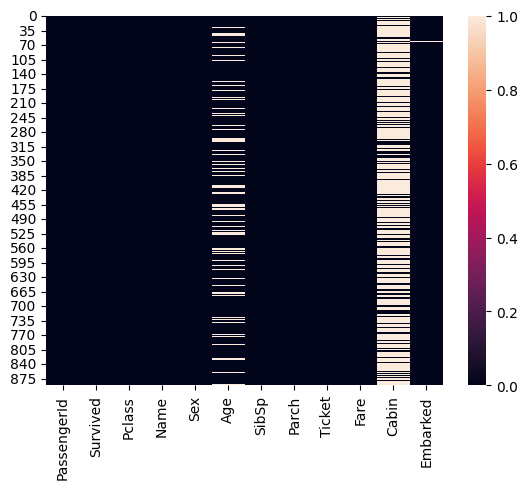

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df['Survived'].unique()

array([0, 1])

In [ ]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

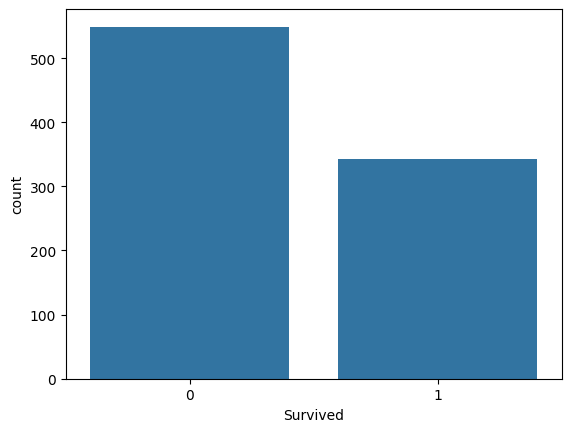

In [ ]:
sns.countplot(x='Survived',data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
pd.get_dummies(df['Sex'],drop_first=True).head(10)

,male
0,True
1,False
2,False
3,False
4,True
5,True
6,True
7,True
8,False
9,False


In [ ]:
pd.get_dummies(df['Sex']).head(10)

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
5,False,True
6,False,True
7,False,True
8,True,False
9,True,False


In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
pd.get_dummies(df['Embarked']).head(20)

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
5,False,True,False
6,False,False,True
7,False,False,True
8,False,False,True
9,True,False,False


In [ ]:
pd.get_dummies(df['Embarked'],drop_first=True).head(20)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
5,True,False
6,False,True
7,False,True
8,False,True
9,False,False


In [ ]:
gender = pd.get_dummies(df['Sex'],drop_first=True)

In [ ]:
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [ ]:
df.drop(['PassengerId','Name','Sex','Embarked','Ticket'],axis=1,inplace=True)

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,0,3,22.0,1,0,7.2500,NaN
1,1,1,38.0,1,0,71.2833,C85
2,1,3,26.0,0,0,7.9250,NaN
3,1,1,35.0,1,0,53.1000,C123
4,0,3,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN
887,1,1,19.0,0,0,30.0000,B42
888,0,3,NaN,1,2,23.4500,NaN
889,1,1,26.0,0,0,30.0000,C148


In [ ]:
df = pd.concat([df,gender,embark],axis=1)

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,3,22.0,1,0,7.2500,NaN,True,False,True
1,1,1,38.0,1,0,71.2833,C85,False,False,False
2,1,3,26.0,0,0,7.9250,NaN,False,False,True
3,1,1,35.0,1,0,53.1000,C123,False,False,True
4,0,3,35.0,0,0,8.0500,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,True,False,True
887,1,1,19.0,0,0,30.0000,B42,False,False,True
888,0,3,NaN,1,2,23.4500,NaN,False,False,True
889,1,1,26.0,0,0,30.0000,C148,True,False,False


In [ ]:
df.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,-0.022405,-0.032523
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603
male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722
Q,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624
S,-0.155660,0.081720,-0.032523,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    bool   
 7   Q         891 non-null    bool   
 8   S         891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [ ]:
891-714

177

Task to do now: ETA 10 mins

Write a udf to fill in the NaN values:
The nan value should be replaced by the average value of a specific class.

In [ ]:
df.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
5,0,3,NaN,0,0,8.4583,True,True,False
6,0,1,54.0,0,0,51.8625,True,False,True
7,0,3,2.0,3,1,21.0750,True,False,True
8,1,3,27.0,0,2,11.1333,False,False,True
9,1,2,14.0,1,0,30.0708,False,False,False


In [ ]:
df.groupby("Pclass").mean()["Age"]

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [ ]:
def compute_age(cols):
  age = cols[0]
  pclass = cols[1]
  if pd.isnull(age):
    if pclass == 1:
      return 38
    elif pclass == 2:
      return 30
    else:
      return 25
  else:
    return age

In [ ]:
df['Age'] = df[['Age','Pclass']].apply(compute_age,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    bool   
 7   Q         891 non-null    bool   
 8   S         891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [ ]:
avg_age_by_class = df.groupby('Pclass').mean()['Age']
avg_age_by_class

Pclass
1    38.201019
2    29.884946
3    25.101670
Name: Age, dtype: float64

In [ ]:
#df['Age'] = df['Age'].fillna(df['Pclass'].map(avg_age_by_class))

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,25.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [ ]:
x = df.drop('Survived',axis=1) #labelled data (Independent Variables)
y = df['Survived'] #target column (Dependent Variables)

In [ ]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
#Building a logistic regression model
#To divide your into train and test datasets.
from sklearn.model_selection import train_test_split #sci-kit learn

In [ ]:
a,b = (10,20)
print(a)
print(b)

10
20


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=80)

1

2

3

4

5

6

7

8

9

10

------------- 8 records for training and 2 for testing.

2

8

3

9

10

1

4

6

-----
5

7
----- random_state = 3
1

4

7

10

2

5

8

----
6

3

9



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    bool   
 7   Q         891 non-null    bool   
 8   S         891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [ ]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
6,1,54.0,0,0,51.8625,True,False,True
95,3,25.0,0,0,8.0500,True,False,True
830,3,15.0,1,0,14.4542,False,False,False
57,3,28.5,0,0,7.2292,True,False,False
887,1,19.0,0,0,30.0000,False,False,True


In [ ]:
y_train.head()

6      0
95     0
830    1
57     0
887    1
Name: Survived, dtype: int64

In [ ]:
df.iloc[112]

Survived        0
Pclass          3
Age          22.0
SibSp           0
Parch           0
Fare         8.05
male         True
Q           False
S            True
Name: 112, dtype: object

In [ ]:
x_train.shape

(623, 8)

In [ ]:
x_test.shape

(268, 8)

In [ ]:
#11/06
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0])

In [ ]:
x_test.head(20)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
155,1,51.0,0,1,61.3792,True,False,False
459,3,25.0,0,0,7.7500,True,True,False
309,1,30.0,0,0,56.9292,False,False,False
595,3,36.0,1,1,24.1500,True,False,True
449,1,52.0,0,0,30.5000,True,False,True
429,3,32.0,0,0,8.0500,True,False,True
22,3,15.0,0,0,8.0292,False,True,False
551,2,27.0,0,0,26.0000,True,False,True
722,2,34.0,0,0,13.0000,True,False,True
136,1,19.0,0,2,26.2833,False,False,True


In [ ]:
#Model Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)*100

78.35820895522389

In [ ]:
accuracy_score(y_test,y_pred)*100

78.35820895522389

In [ ]:
accuracy_score(y_test,y_pred)*100

78.35820895522389

In [ ]:
accuracy_score(y_test,y_pred)*100 #with random_state = 80

78.35820895522389

In [ ]:
accuracy_score(y_test,y_pred)*100

78.35820895522389

In [ ]:
confusion_matrix(y_test,y_pred)

array([[139,  23],
       [ 35,  71]])

the sigmoid function is responsible for mapping the predicted value to the probability. The value of the sigmoid function lies between 0 and 1, so it forms the curve like 'S'. We have a threshold value i.e 0.5, the predicted value above the threshold value will lead to the prediction as 1 and a value below the threshold will lead to the predicated value as 0.

Inputs: Features from the data.

Sigmoid function : Will find the probability

Prediction : Classification based on the probability

Testing the model.